In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
import requests
import pandas as pd

url = "https://data360api.worldbank.org/data360/data"
params = {
    "DATABASE_ID": "WB_HCP",
    "INDICATOR": "WB_HCP_HYPERTENSION",
    "REF_AREA": "SAU"
}

response = requests.get(url, params=params)
data = response.json()
df = pd.DataFrame(data['value'])
df = df[['TIME_PERIOD', 'OBS_VALUE']]
df = df.rename(columns={'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Hypertension (%)'})


In [3]:
df

,Year,Hypertension (%)
0,1990,34.4
1,1990,34.4
2,1990,34.1
3,1991,34.5
4,1991,34.5
...,...,...
85,2018,36.2
86,2018,30.5
87,2019,34
88,2019,36.3


In [4]:
df.duplicated().sum()

6

In [5]:
df = df.drop_duplicates()


In [6]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 89
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              84 non-null     object
 1   Hypertension (%)  84 non-null     object
dtypes: object(2)
memory usage: 2.0+ KB


Year                0
Hypertension (%)    0
dtype: int64

In [7]:
df['Hypertension (%)'] = pd.to_numeric(df['Hypertension (%)'], errors='coerce')

C:\Users\wasee\AppData\Local\Temp\ipykernel_20440\4130018874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hypertension (%)'] = pd.to_numeric(df['Hypertension (%)'], errors='coerce')


In [8]:
df['Year'] = pd.to_datetime(df['Year'])

C:\Users\wasee\AppData\Local\Temp\ipykernel_20440\47656207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 89
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              84 non-null     datetime64[ns]
 1   Hypertension (%)  84 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 KB


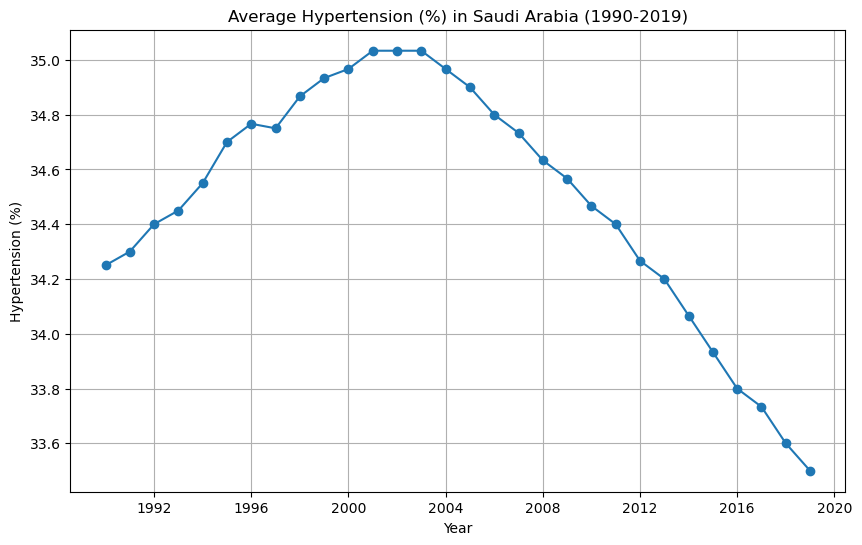

In [10]:
df_mean = df.groupby('Year')['Hypertension (%)'].mean().reset_index()


plt.figure(figsize=(10,6))
plt.plot(df_mean['Year'], df_mean['Hypertension (%)'], marker='o')
plt.title('Average Hypertension (%) in Saudi Arabia (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Hypertension (%)')
plt.grid(True)
plt.savefig('Average Hypertension in Saudi arabia',dpi=300)
plt.show()


## Average Hypertension (%) in Saudi Arabia (1990-2019)

This line chart shows the average prevalence of hypertension (%) among adults aged 30-79 in Saudi Arabia from 1990 to 2019.  
The data is sourced from the World Bank's Human Capital Project dataset.

- The average prevalence increased slightly from 1990, peaking around 2004-2006.
- It then gradually declined, reaching the lowest levels by 2019.

This trend may reflect improvements in public health awareness, lifestyle modifications, or better hypertension management programs.



In [15]:
df = df.reset_index()


In [16]:
df.set_index('Year', inplace=True)


In [17]:
from statsmodels.tsa.stattools import adfuller


df['Hypertension_diff'] = df['Hypertension (%)'].diff()
df.dropna(inplace=True)


result_diff = adfuller(df['Hypertension_diff'])
print("ADF after first differencing:", result_diff[0])
print("p-value:", result_diff[1])


ADF after first differencing: -2.444909138559503
p-value: 0.1294600929958733


In [18]:
df['Hypertension_diff2'] = df['Hypertension_diff'].diff()
df.dropna(inplace=True)

# اختبار ADF بعد الفرق الثاني
result_diff2 = adfuller(df['Hypertension_diff2'])
print("ADF after second differencing:", result_diff2[0])
print("p-value:", result_diff2[1])


ADF after second differencing: -6.19315928136291
p-value: 6.05375719904204e-08


In [19]:
import statsmodels.api as sm
model = sm.tsa.ARIMA(df['Hypertension (%)'], order=(1,2,1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:       Hypertension (%)   No. Observations:                   82
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -162.616
Date:                Thu, 03 Jul 2025   AIC                            331.233
Time:                        17:08:35   BIC                            338.379
Sample:                             0   HQIC                           334.098
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5120      0.110     -4.661      0.000      -0.727      -0.297
ma.L1         -0.9998     26.332     -0.038      0.970     -52.609      50.610
sigma2         3.1865     83.845      0.038      0.9

C:\Users\wasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\wasee\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


C:\Users\wasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\wasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\wasee\AppData\Local\Temp\ipykernel_20440\2526691072.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years = pd.date_range(start=f'{last_year+1}', periods=forecast_steps, freq='Y')


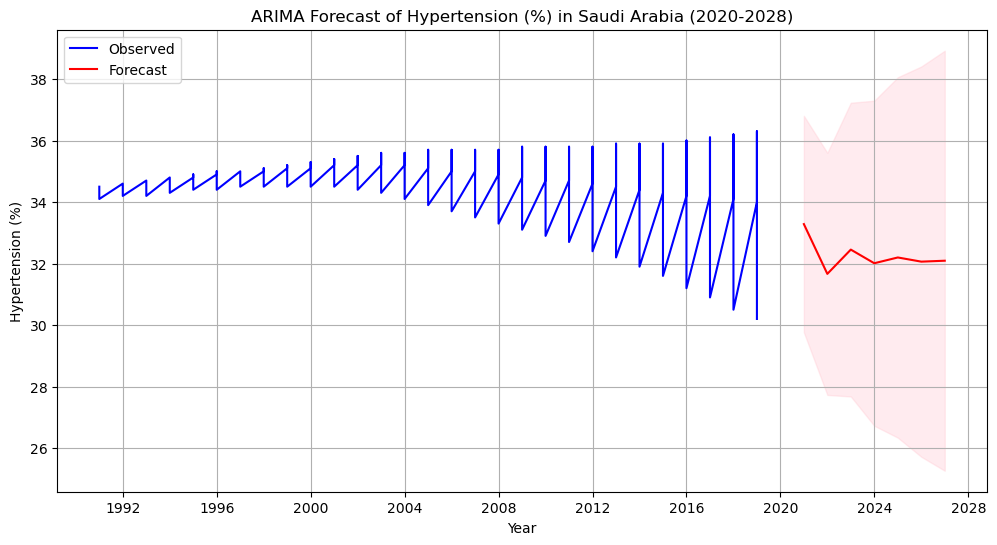

In [22]:
forecast_steps = 7
forecast = results.get_forecast(steps=forecast_steps)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


last_year = df.index[-1].year
future_years = pd.date_range(start=f'{last_year+1}', periods=forecast_steps, freq='Y')


plt.figure(figsize=(12,6))
plt.plot(df.index, df['Hypertension (%)'], label='Observed', color='blue')
plt.plot(future_years, predicted_mean, color='red', label='Forecast')
plt.fill_between(future_years, 
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1], 
                 color='pink', alpha=0.3)

plt.title('ARIMA Forecast of Hypertension (%) in Saudi Arabia (2020-2028)')
plt.xlabel('Year')
plt.ylabel('Hypertension (%)')
plt.legend()
plt.grid(True)
plt.savefig('Average Hypertension in Saudi arabia_forecast',dpi=300)
plt.show()



##  Hypertension Forecast in Saudi Arabia (1990-2028)

This chart shows:
- **Blue line (Observed):** Actual historical prevalence of hypertension (%) in Saudi Arabia from 1990 to 2019.
- **Red line (Forecast):** ARIMA model forecast for the upcoming years until 2028.
- **Pink shaded area (95% Confidence Interval):** Represents the range within which we expect the true values to fall with 95% confidence.

### Observations:
- The confidence interval is narrower in the early years (2020-2022), indicating higher certainty.
- It widens towards 2028, reflecting increased uncertainty in long-term forecasts.

## Note:
- The original data had **approximately 3 measurements per year**, which explains the zig-zag pattern in the blue line within each year.
- Still, the general trend suggests a slight decline and stabilization around 32-33% in the coming years.

In [29]:
import requests
import pandas as pd

url = "https://data360api.worldbank.org/data360/data"

params = {
    "DATABASE_ID": "WB_WDI",
    "INDICATOR": "WB_WDI_SH_STA_DIAB_ZS",
    "REF_AREA": "SAU",
    "timePeriodFrom": "1990",
    "timePeriodTo": "2021"
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data['value'])
    df = df[['TIME_PERIOD', 'OBS_VALUE']]
    df = df.rename(columns={'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Diabetes (%)'})
    df['Year'] = df['Year'].astype(int)
    print(df)
else:
    print("Failed to retrieve data")


   Year Diabetes (%)
0  2011         19.6
1  2021         18.7


In [30]:
pd.DataFrame(df)

,Year,Diabetes (%)
0,2011,19.6
1,2021,18.7


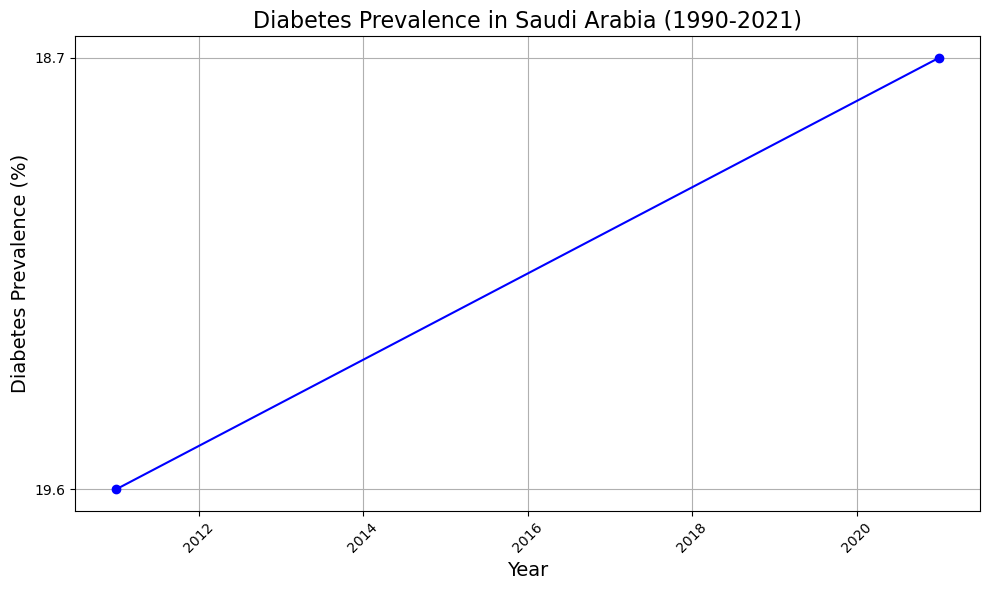

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Diabetes (%)'], marker='o', linestyle='-', c='b')

plt.title('Diabetes Prevalence in Saudi Arabia (1990-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Diabetes Prevalence (%)', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
